# Setup

In [31]:
# install the surprise packages which is a Python scikit building and analyzing recommender systems
!pip install surprise==0.1

# Import Packages

In [32]:
# import the required tools into the notebook
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import Markdown
from os.path import join
from os.path import exists
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
print('Imports successful!')

Imports successful!


# Data Loading 


In [146]:
Data1 = Dataset.load_builtin('ml-100k')
print('Data load successful!')

Data load successful!


In [147]:
Data=pd.read_csv(Data1. ratings_file, sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'] )
Data['timestamp']=Data['timestamp'].apply(datetime.fromtimestamp)
Data['year']=Data['timestamp'].dt.year
Data['month']=Data['timestamp'].dt.month
Data=Data.sort_values('timestamp')


In [129]:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:\\Users\\h226754/.surprise_data/ml-100k/ml-100k/u.user', sep='|', names=user_cols,
                    encoding='latin-1')

In [130]:
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('C:\\Users\\h226754/.surprise_data/ml-100k/ml-100k/u.item', sep='|', names=movie_cols, usecols=range(5),
                     encoding='latin-1')


In [138]:
movie_ratings = pd.merge(movies, Data)
names = pd.merge(movie_ratings, users)

In [213]:
Ten_movies=names.title.value_counts()[:10]
print(Ten_movies)

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64


# Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Average Ratings Distribution')

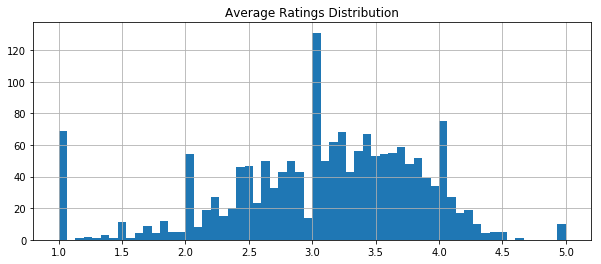

In [208]:
ratings = pd.DataFrame(names.groupby('title')['rating'].mean())
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=60)
plt.title('Average Ratings Distribution')

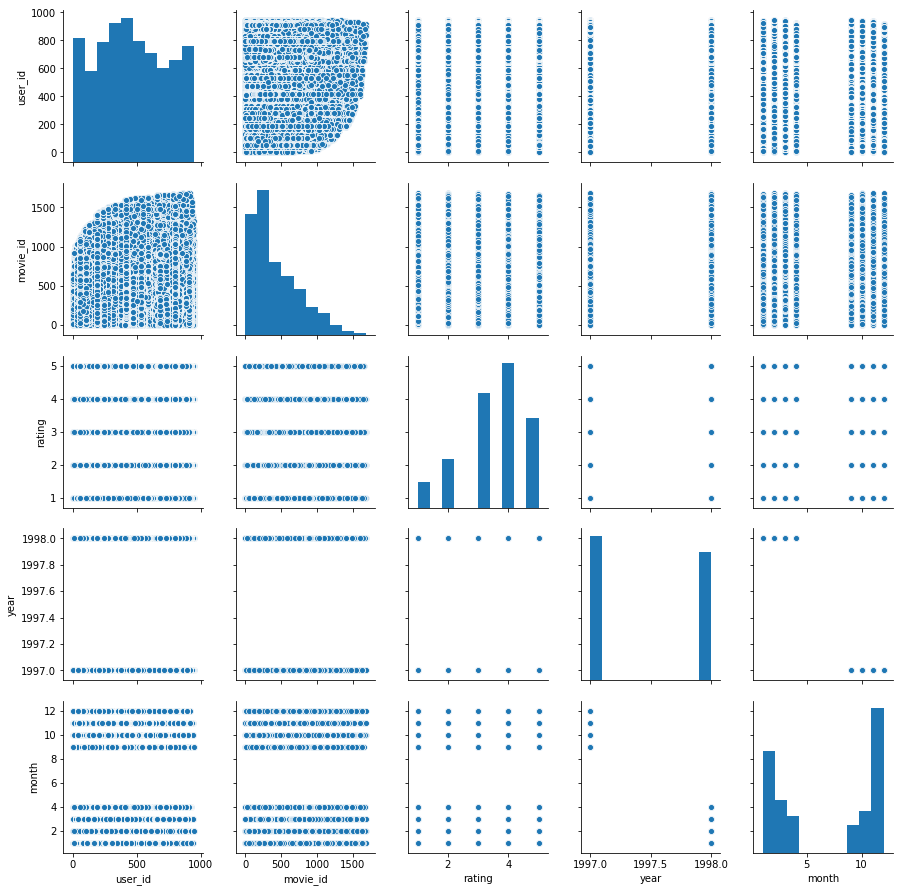

In [165]:
g = sns.pairplot(Data)

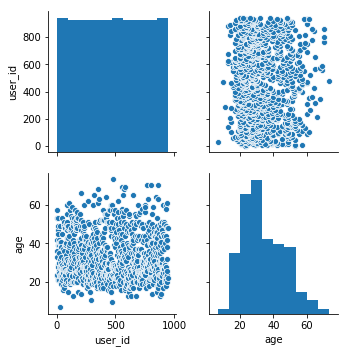

In [166]:
g1 = sns.pairplot(users)

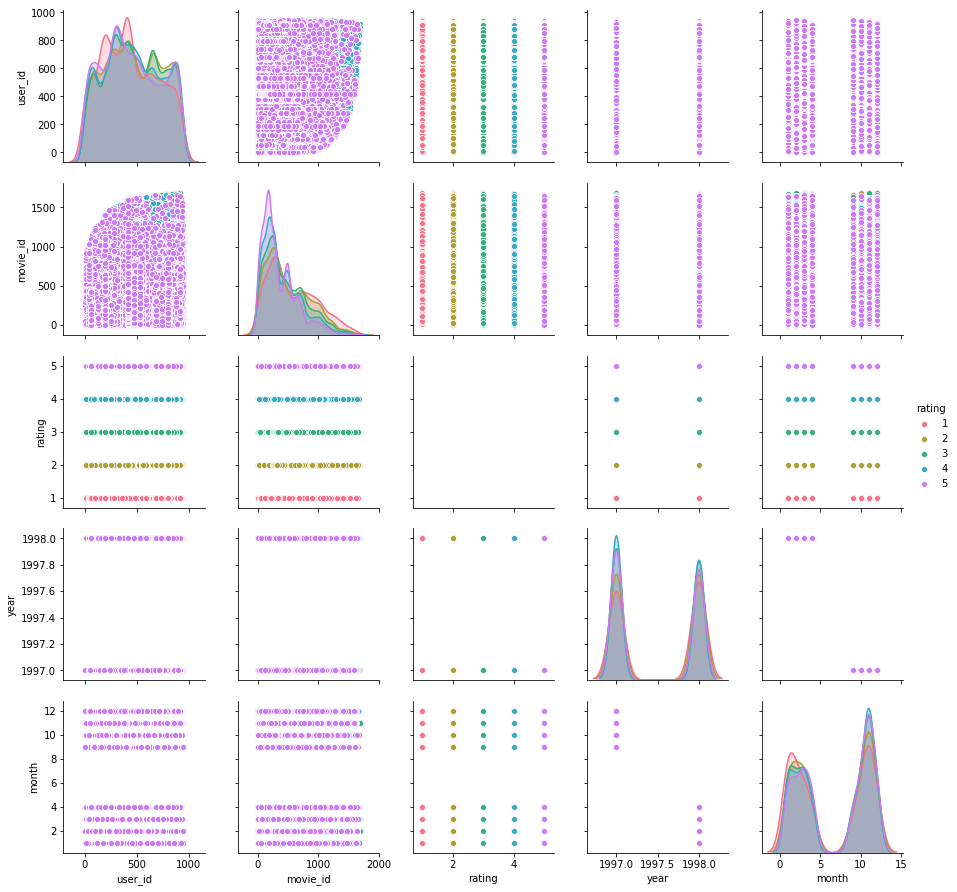

In [219]:
g2 = sns.pairplot(Data, hue="rating", palette="husl")

In [212]:
#  Ratings have been given by the M,F sex difference
pivoted = names.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)


# Histogram and distribution of all the ratings I have in the dataset

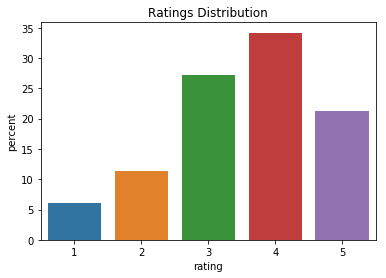

In [37]:
first_plot=(Data['rating'].value_counts(normalize=True, sort=False).multiply(100).reset_index().rename(columns={'rating':'percent', 'index':'rating'}))
ax=sns.barplot(x='rating', y='percent' , data=first_plot)
ax.set_title ('Ratings Distribution')
plt.show()

# Modeling

In [38]:
# there is enough variation in the distribution that a simple recommendation algorithm will not be able to get 
# accurate predictions upon missing entry.
#Four different machine learning recommendation algorithms are used for this project to compare and evaluate the performance of the models.
# To evaluate the performance of an algorithm,it is better to know how well does an algorithm predict an unknown entry.
# if entry is unknown, it is hard to say how the prediction is good.To overcome this, a simple but i use cross validation.
# The choice of this 20/80 train test split is done at random.
# To evaluate the performance of the prediction, I utilize the metric,known as root mean squared error, or RMSE.

# First Model: Random Model

In [39]:
# The first model which is called , a random recommendation algorithm which uses 
# any of the five ratings at random and does a prediction

In [40]:
# Create random model
model_random = NormalPredictor()
print('Model creation successful!')

Model creation successful!


In [41]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, Data1, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5143  1.5078  1.5261  1.5189  1.5183  1.5171  0.0060  
Fit time          0.09    0.10    0.10    0.10    0.10    0.10    0.01    
Test time         0.14    0.08    0.13    0.08    0.13    0.11    0.03    
Model training successful!


# Second Model: User-Based Collaborative Filtering

In [42]:
# Create User-Based Collaborative Filterin model 
model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [43]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_user_results = cross_validate(model_user, Data1, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9833  0.9776  0.9828  0.9720  0.9792  0.9790  0.0041  
Fit time          0.35    0.36    0.37    0.38    0.36    0.37    0.01    
Test time         2.31    2.37    2.49    2.34    2.33    2.37    0.07    
Model training successful!


# Third Model: Item_Based Collaborative Filtering

In [44]:
# Create Item-Based Collaborative Filterin model
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [45]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_item_results = cross_validate(model_item, Data1, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9678  0.9776  0.9711  0.9747  0.9792  0.9741  0.0042  
Fit time          0.50    0.51    0.52    0.56    0.51    0.52    0.02    
Test time         2.61    2.76    2.72    2.70    2.68    2.69    0.05    
Model training successful!


# Fourth Model: Matrix Factorization

In [46]:
# Create Matrix Factorizatio model
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [47]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_matrix_results = cross_validate(model_matrix, Data1, measures=['RMSE'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9355  0.9312  0.9306  0.9359  0.9399  0.9346  0.0034  
Fit time          3.25    3.32    3.38    3.28    3.27    3.30    0.05    
Test time         0.17    0.10    0.10    0.17    0.10    0.13    0.03    
Model training successful!


# PRECISION/RECALL

In [48]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    
    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('Function creation successful!')

Function creation successful!


In [49]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(Data1):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')

print('Precision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.584
>>> reccall  : 0.341


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.762
>>> reccall  : 0.453


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.818
>>> reccall  : 0.388


>>> k=5, model=SVD
>>> precision: 0.783
>>> reccall  : 0.43

# Top n predictions

In [52]:
def get_top_n(predictions, n=10):
  
    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


In [53]:
trainset = Data1.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


In [291]:
MD=[];
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=10)
    # Print the first one
    user = list(top_n.keys())[0]
    MD.append(f'{top_n[user]}')
    print(f'model: {model}, {user}: {top_n[user]}')

print('Top N computation successful!')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x000001DEB1859518>, 196: [('86', 5), ('144', 5), ('234', 5), ('288', 5), ('1049', 5), ('23', 5), ('96', 5), ('789', 5), ('1147', 5), ('273', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001DEB0DD5B70>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5), ('1653', 5), ('1467', 5), ('1122', 5), ('1201', 5), ('1293', 4.999999999999999)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001DEB0DD5978>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075), ('1536', 4.1875), ('1593', 4.182926829268292), ('1433', 4.116751269035532), ('1626', 4.095555555555556), ('600', 4.078028747433264)]
model: <surprise.prediction_algorithms.matrix_factoriza

In [391]:
from ast import literal_eval

MDS=[];
for i in  range(len(MD)):
    
    str1 = MD[i].replace(']','').replace('[','')
    l = MD[i].replace('"','')
    l2=l.replace(']','').replace('[','')
    l3=l2.replace('"','')
    l4= literal_eval(l3)
    l5=list(l4)
    MDS.append(l5)
    

In [467]:

model_name=['Random Model','User-Based_CF','Item-Based_CF','Matrix Factorization']
top_10_movies=pd.DataFrame()
for movie_model in range(len(MDS)):
    for m_rank in range(10):
        mv=MDS[movie_model][m_rank]
        m_id=int(mv[0])
        m_ranking=mv[1]
        mv_name=names['title'][names['movie_id']==m_id].iloc[0]
        data_to_add={"Model": model_name[movie_model],"ID":m_id,"Rank":m_ranking,"Name":mv_name}
        top_10_movies=top_10_movies.append(data_to_add,ignore_index=True)
top_10_movies
        
        

,ID,Model,Name,Rank
0,86.0,Random Model,"Remains of the Day, The (1993)",5.000000
1,144.0,Random Model,Die Hard (1988),5.000000
2,234.0,Random Model,Jaws (1975),5.000000
3,288.0,Random Model,Scream (1996),5.000000
4,1049.0,Random Model,House Arrest (1996),5.000000
5,23.0,Random Model,Taxi Driver (1976),5.000000
6,96.0,Random Model,Terminator 2: Judgment Day (1991),5.000000
7,789.0,Random Model,Swimming with Sharks (1995),5.000000
8,1147.0,Random Model,My Family (1995),5.000000
9,273.0,Random Model,Heat (1995),5.000000


In [470]:
real_mean_rank=[]
for i in range(len(top_10_movies)):
    real_mean_rank.append(names[names['movie_id']==top_10_movies['ID'][i]]['rating'].mean())

In [477]:
top_10_movies['Actual_rating']=real_mean_rank

In [499]:
Random_Model=top_10_movies[0:10]
User_Based_CF=top_10_movies[10:20]
Item_Based_CF=top_10_movies[20:30]
Matrix_Factorization=top_10_movies[30:40]

Random_Model=Random_Model.rename(columns={'Rank': 'RM_rating', 'Actual_rating': 'Actual_rating'})
User_Based_CF=User_Based_CF.rename(columns={'Rank': 'UB_model_rating', 'Actual_rating': 'Actual_rating'})
Item_Based_CF=Item_Based_CF.rename(columns={'Rank': 'IB_model_rating', 'Actual_rating': 'Actual_rating'})
Matrix_Factorization=Matrix_Factorization.rename(columns={'Rank': 'MF_model_rating', 'Actual_rating': 'Actual_rating'})

([<matplotlib.axis.XTick at 0x1dea32d6c50>,
 <a list of 11 Text xticklabel objects>)

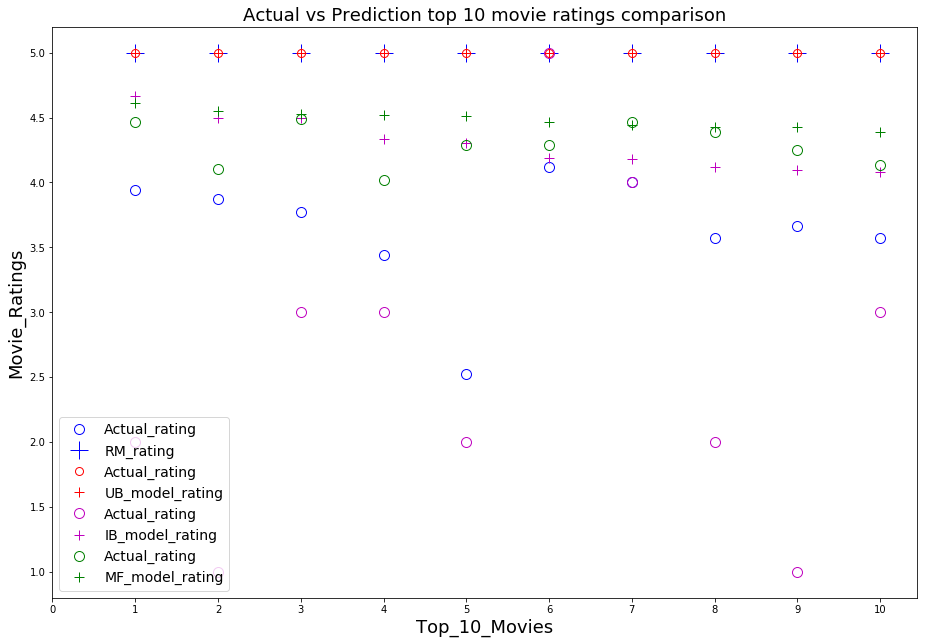

In [561]:

X=range(1,11)
fig=plt.figure()
fig.set_size_inches(15.5, 10.5)
plt.plot(X,Random_Model['Actual_rating'],'bo', markersize=10,  mfc='none')
plt.plot(X,Random_Model['RM_rating'],'b+', markersize=18)
plt.plot(X,User_Based_CF['Actual_rating'],'ro', markersize=8, mfc='none')
plt.plot(X,User_Based_CF['UB_model_rating'],'r+', markersize=10)
plt.plot(X,Item_Based_CF['Actual_rating'],'mo', markersize=10,mfc='none')
plt.plot(X,Item_Based_CF['IB_model_rating'],'m+', markersize=10)
plt.plot(X,Matrix_Factorization['Actual_rating'],'go', markersize=10, mfc='none')
plt.plot(X,Matrix_Factorization['MF_model_rating'],'g+', markersize=10)
plt.legend(loc='lower left', fontsize=14)
plt.xlabel('Top_10_Movies', fontsize=18)
plt.ylabel('Movie_Ratings', fontsize=18) 
plt.title('Actual vs Prediction top 10 movie ratings comparison', fontsize=18)
plt.xticks(range(0,11))